In [238]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('kaggle.csv')

print("The shape of the dataset is: ", df.shape)
print("The columns of the dataset are: ", df.columns.values)

The shape of the dataset is:  (14765, 7)
The columns of the dataset are:  ['artist' 'songs' 'song' 'artist_key' 'url' 'words count'
 'unique words count']


In [239]:
df.head()

,artist,songs,song,artist_key,url,words count,unique words count
0,אדם,"['אחרי', 'שאמות', 'יבואו', 'פתאום', 'אנשים', '...",אחרי שאמות,Artist_Adam,http://shironet.mako.co.il/artist?type=lyrics&...,103,79
1,אדם,"['אתה', 'תראה', 'עוד', 'יגיעו', 'ימים', 'טובים...",אין יותר שדים,Artist_Adam,http://shironet.mako.co.il/artist?type=lyrics&...,117,85
2,אדם,"['משוטט', 'ברחוב', 'במתח', 'תר', 'בכל', 'חלון'...",אין מוצא,Artist_Adam,http://shironet.mako.co.il/artist?type=lyrics&...,67,47
3,אדם,"['איש', 'עוד', 'לא', 'הכיר', 'אותי', 'כמו', 'ש...",איש עוד לא הכיר אותי,Artist_Adam,http://shironet.mako.co.il/artist?type=lyrics&...,134,48
4,אדם,"['אנשים', 'טועים', 'בחושך', 'גשם', 'ניתך', 'הם...",אל תשכח,Artist_Adam,http://shironet.mako.co.il/artist?type=lyrics&...,135,61


In [240]:
df.describe()

,words count,unique words count
count,14765.000000,14765.000000
mean,112.443210,70.598171
std,61.125532,36.340199
min,0.000000,0.000000
25%,78.000000,50.000000
50%,101.000000,65.000000
75%,134.000000,83.000000
max,771.000000,456.000000


In [241]:
# Clean empty songs (songs with non-hebrew lyrics)
cleaned_df = df[df['songs'] != '[]']
print(f"Total number of songs: {len(cleaned_df)}")

Total number of songs: 14543


In [242]:
# Get the number of artists
artists = cleaned_df['artist'].unique()
print(f"Total number of artists: {len(artists)}")

Total number of artists: 166


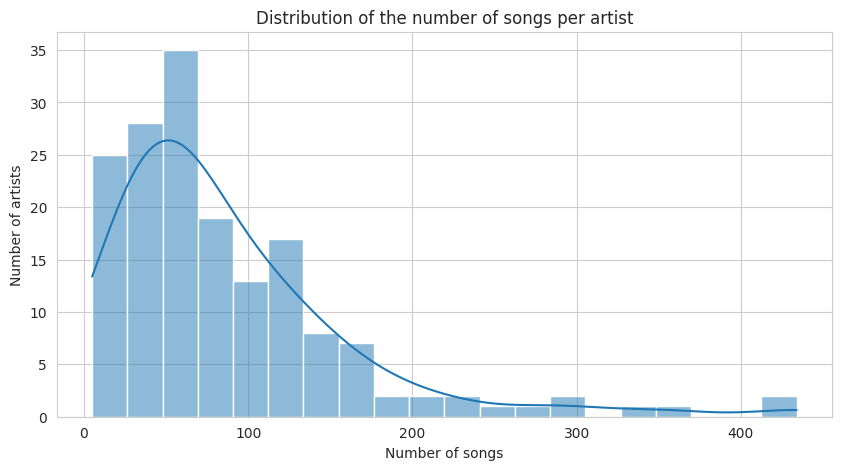

In [243]:
# Plot the distribution of the number of songs per artist

# Get the number of songs per artist
songs_per_artist = cleaned_df.groupby('artist').count()['songs']
# Plot the distribution
plt.figure(figsize=(10, 5))
plt.title('Distribution of the number of songs per artist')
plt.xlabel('Number of songs')
plt.ylabel('Number of artists')
sns.histplot(songs_per_artist, bins=20, kde=True);

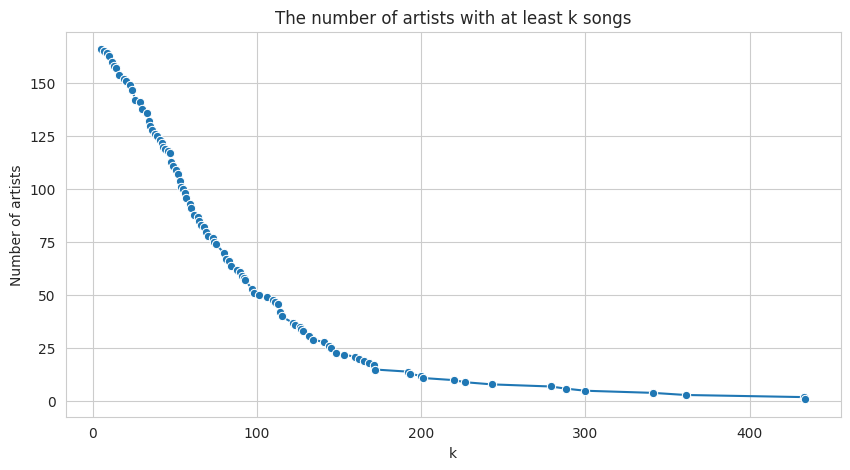

In [244]:
# Plot the number of artists with at least k songs
artists_per_songs = songs_per_artist.value_counts().sort_index(ascending=False)

artists_per_threshold = artists_per_songs.cumsum()

plt.figure(figsize=(10, 5))
plt.title('The number of artists with at least k songs')
plt.xlabel('k')
plt.ylabel('Number of artists')
sns.lineplot(data=artists_per_threshold, marker='o');

In [245]:
songs_per_artist[songs_per_artist > 100].value_counts().sort_index(ascending=False)

434    1
433    1
361    1
341    1
300    1
288    1
279    1
243    1
227    1
220    1
201    1
200    1
193    1
192    1
172    1
171    2
168    1
165    1
162    1
160    1
153    1
148    1
145    2
144    1
141    2
134    1
132    2
128    2
127    1
126    1
123    1
122    1
115    3
114    2
113    4
111    1
110    1
106    1
101    1
Name: songs, dtype: int64

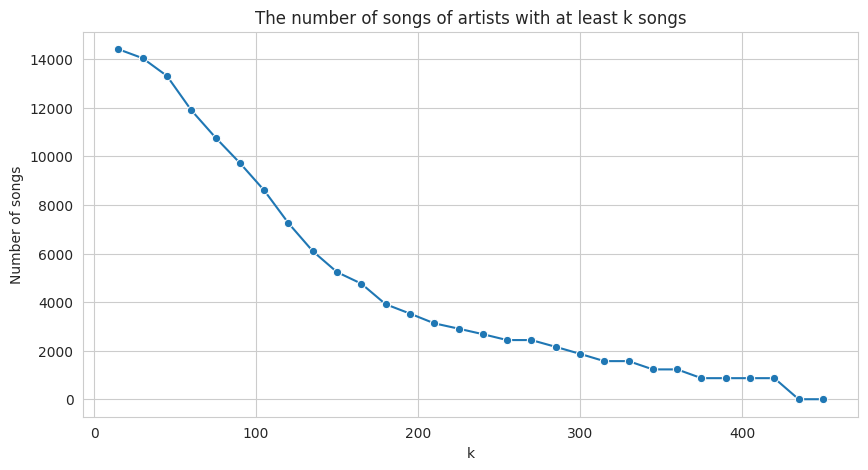

In [246]:
threshold = list(range(450, 1, -15))
songs_per_threshold = [(songs_per_artist[songs_per_artist >= threshold]).sum() for threshold in threshold]

plt.figure(figsize=(10, 5))
plt.title('The number of songs of artists with at least k songs')
plt.xlabel('k')
plt.ylabel('Number of songs')
sns.lineplot(x=threshold, y=songs_per_threshold, marker='o');